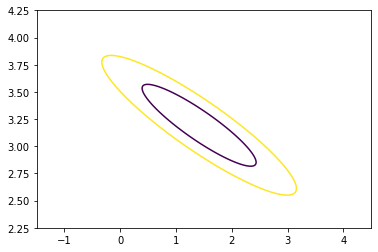

In [7]:
##Necessary Imports
import numpy as np
import numpy.random as nprd
import matplotlib.pyplot as plt

##Specify x and y data
x = [1,2,3,4,5]
y = [3.83,8.75,10.98,14.18,17.22]

##Define sigma and range and nunmber of trial parameters for a and b
sigma = 0.71
a = np.linspace(-1.5,4.5,500)
b = np.linspace(2.25,4.25,500)

##Calculate chi-squared for trial parameters
chisq = np.zeros((len(a),len(b)))

for i in range(0,len(a)):
    for j in range(0,len(b)):
        for k in range(0,5):
            chisq[i,j] = chisq[i,j] + ((y[k]-(a[i]+b[j]*x[k]))/sigma)**2

##Calculate delchisq
chisqmin = np.amin(chisq)
delchisq = chisq - chisqmin

##Create and plot contours
cont = [2.3, 6.7, 11.8]
plt.contour(a,b,delchisq,cont)
plt.show()

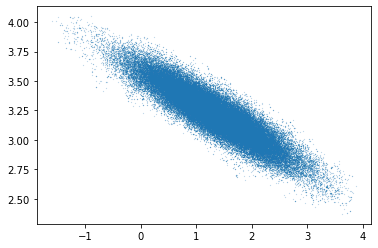


From MCMC
a           b
[1.3254376629549314, 3.222691251735873]
[0.7314114032814445, 0.22119340263822526]
Covariance
-0.14567871166958624
Acceptance Ratio
0.80661


In [4]:
##Necessary Imports
import numpy as np
import numpy.random as nprd
import matplotlib.pyplot as plt

##Specify x and y data
x = [1,2,3,4,5]
y = [3.83,8.75,10.98,14.18,17.22]

##Define sigma
sigma = 0.71

##Specify length of MCMC chain
nmcmc = 100000

a = np.zeros(nmcmc)
b = np.zeros(nmcmc)
chisq = np.zeros(nmcmc)

##Specify initial values, width of proposal density, and counter to compute acceptance ratio
accept = 0
a[0] = 1.33
sig_a = 0.1
b[0] = 3.22
sig_b = 0.05

##Loop over the data points for chisquared calculation
for k in range(0,len(x)):
    chisq[0] = chisq[0] + ((y[k]-(a[0]+b[0]*x[k]))/sigma)**2

##Go over points in the chain
for i in range(1,nmcmc):
    #print("Point "+str(i+1)+" of "+str(nmcmc), end="\r")

    ##Determine trial values
    a_trial = a[i-1] + sig_a*nprd.randn(1)
    b_trial = b[i-1] + sig_b*nprd.randn(1)

    ##Set initial value of chisq for trial point
    chisq_trial = 0

    ##Calculate the value of chisq for trial point
    for k in range(0,len(x)):
        chisq_trial = chisq_trial + ((y[k]-(a_trial+b_trial*x[k]))/sigma)**2

    ##Calculate trial value of log ratio
    log_Lratio = 0.5*(chisq[i-1]-chisq_trial)

    ##Decide whether or not to accept trial value
    ##If trial point is "uphill" from previous point, accept it
    if log_Lratio >= 0:
        a[i] = a_trial
        b[i] = b_trial
        chisq[i] = chisq_trial
        accept = accept + 1

    ##If it is not, calculate the actual likelihood ratio, then pick a random number and if bigger accept, 
    #if smaller set the point as the previous point in the Markov Chain
    else:
        ratio = np.exp(log_Lratio)
        test_uniform = nprd.rand(1)

        if test_uniform <= ratio:
            a[i] = a_trial
            b[i] = b_trial
            chisq[i] = chisq_trial
            accept = accept + 1

        else:
            a[i] = a[i-1]
            b[i] = b[i-1]
            chisq[i] = chisq[i-1]
            
accept_ratio = accept/nmcmc

##Plotting and information
plt.scatter(a,b,0.01)
plt.show()

bar = [np.mean(a), np.mean(b)]
err = [np.std(a), np.std(b)]

cvr = np.cov(a,b)
covari = cvr[0,1]

print("")
print("From MCMC")
print("a           b")
print(bar)
print(err)
print("Covariance")
print(covari)
print("Acceptance Ratio")
print(accept_ratio)


  Created wheel for corner: filename=corner-2.0.1-cp37-none-any.whl size=11648 sha256=97aa41f337537d408ae88fc2a8ce4a34c13321852a86140ab7caab7363775ccd
  Stored in directory: C:\Users\Thinkpad\AppData\Local\pip\Cache\wheels\70\d8\e5\e0e7974a2a5757483ea5a180c937041cf6872dc9993d78234a
Successfully built corner


Point 5486 of 100000

Point 7043 of 100000

Point 13239 of 100000

Point 16373 of 100000

Point 19260 of 100000

Point 26757 of 100000

Point 28142 of 100000

Point 31160 of 100000

Point 34310 of 100000

Point 40221 of 100000

Point 42052 of 100000

Point 43483 of 100000

Point 52861 of 100000

Point 56068 of 100000

Point 63538 of 100000

Point 71250 of 100000

Point 74244 of 100000

Point 75877 of 100000

Point 77303 of 100000

Point 80361 of 100000

Point 89349 of 100000

Point 93439 of 100000

Point 96058 of 100000

[[1.33       3.22      ]
 [1.39432514 3.22114363]
 [1.3699767  3.19542153]
 ...
 [1.82799621 3.06041434]
 [1.77284395 3.14509272]
 [1.7383543  3.10308867]]



From MCMC
a           b
[1.3411012100925455, 3.218486303802742]
[0.7640337716479578, 0.22955301329990843]
Covariance
-0.1594819316417451
Acceptance Ratio
0.8054


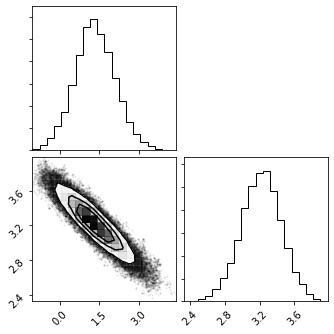

In [6]:
##Necessary Imports
!pip install corner
import numpy as np
import numpy.random as nprd
import matplotlib.pyplot as plt
import corner

##Specify x and y data
x = [1,2,3,4,5]
y = [3.83,8.75,10.98,14.18,17.22]

##Define sigma
sigma = 0.71

##Specify length of MCMC chain
nmcmc = 100000

a = np.zeros(nmcmc)
b = np.zeros(nmcmc)
sh = (nmcmc,2)
samples = np.zeros(sh)
chisq = np.zeros(nmcmc)

##Specify initial values, width of proposal density, and counter to compute acceptance ratio
accept = 0
a[0] = 1.33
samples[0,0] = 1.33
sig_a = 0.1
b[0] = 3.22
samples[0,1] = 3.22
sig_b = 0.05

##Loop over the data points for chisquared calculation
for k in range(0,len(x)):
    chisq[0] = chisq[0] + ((y[k]-(a[0]+b[0]*x[k]))/sigma)**2

##Go over points in the chain
for i in range(1,nmcmc):
    print("Point "+str(i+1)+" of "+str(nmcmc), end="\r")

    ##Determine trial values
    a_trial = a[i-1] + sig_a*nprd.randn(1)
    b_trial = b[i-1] + sig_b*nprd.randn(1)

    ##Set initial value of chisq for trial point
    chisq_trial = 0

    ##Calculate the value of chisq for trial point
    for k in range(0,len(x)):
        chisq_trial = chisq_trial + ((y[k]-(a_trial+b_trial*x[k]))/sigma)**2

    ##Calculate trial value of log ratio
    log_Lratio = 0.5*(chisq[i-1]-chisq_trial)

    ##Decide whether or not to accept trial value
    ##If trial point is "uphill" from previous point, accept it
    if log_Lratio >= 0:
        a[i] = a_trial
        b[i] = b_trial
        samples[i,0] = a[i]
        samples[i,1] = b[i]
        chisq[i] = chisq_trial
        accept = accept + 1

    ##If it is not, calculate the actual likelihood ratio, then pick a random number and if bigger accept, if smaller set the point as the previous point in the Markov Chain
    else:
        ratio = np.exp(log_Lratio)
        test_uniform = nprd.rand(1)

        if test_uniform < ratio:
            a[i] = a_trial
            b[i] = b_trial
            samples[i,0] = a[i]
            samples[i,1] = b[i]
            chisq[i] = chisq_trial
            accept = accept + 1

        else:
            a[i] = a[i-1]
            b[i] = b[i-1]
            samples[i,0] = a[i]
            samples[i,1] = b[i]
            chisq[i] = chisq[i-1]

accept_ratio = accept/nmcmc

##Plotting and information

##Do corner plot

print(samples)

figure = corner.corner(samples)

bar = [np.mean(a), np.mean(b)]
err = [np.std(a), np.std(b)]

cvr = np.cov(a,b)
covari = cvr[0,1]

print("")
print("From MCMC")
print("a           b")
print(bar)
print(err)
print("Covariance")
print(covari)
print("Acceptance Ratio")
print(accept_ratio)